In [1]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
import numpy as np
import matplotlib.pyplot as plt

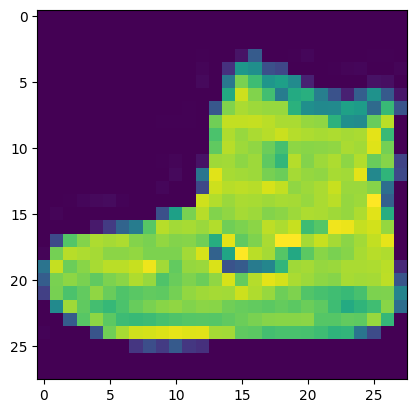

In [4]:
plt.imshow(x_train[0])

In [5]:
x_train.max()

255

In [6]:
x_train = x_train / 255
x_test = x_test / 255

In [9]:
x_train.shape

(60000, 28, 28)

In [10]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

In [12]:
from tensorflow.keras.utils import to_categorical

In [13]:
y_cat_train = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test, 10)

In [15]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [14]:
y_cat_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [19]:
model = Sequential()

model.add(Conv2D(32, (3,3), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPool2D(2, 2))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D(2, 2))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.fit(x_train, y_cat_train, epochs=10, validation_data=(x_test, y_cat_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 62s 32ms/step - accuracy: 0.7805 - loss: 0.6061 - val_accuracy: 0.8609 - val_loss: 0.3656
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 77s 29ms/step - accuracy: 0.8842 - loss: 0.3110 - val_accuracy: 0.8917 - val_loss: 0.2980
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.9067 - loss: 0.2538 - val_accuracy: 0.8989 - val_loss: 0.2835
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.9175 - loss: 0.2235 - val_accuracy: 0.9051 - val_loss: 0.2598
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.9291 - loss: 0.1877 - val_accuracy: 0.9074 - val_loss: 0.2590
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.9394 - loss: 0.1653 - val_accuracy: 0.9069 - val_loss: 0.2539
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 30ms/step - accuracy: 0.9456 - loss: 0.1453 - val_accuracy: 0.9080 - val_loss: 0.2768
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 29ms/step - accuracy: 0.9511 -

In [23]:
import pandas as pd

In [24]:
losses = pd.DataFrame(model.history.history)

<Axes: >

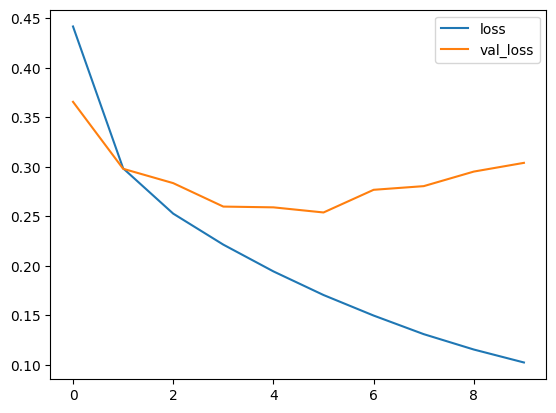

In [35]:
losses[['loss','val_loss']].plot()

<Axes: >

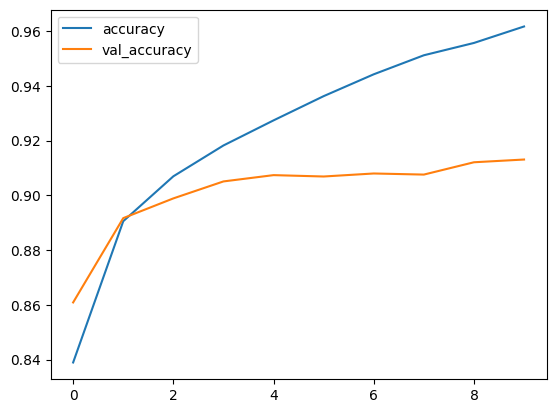

In [36]:
losses[['accuracy','val_accuracy']].plot()

In [26]:
model.metrics_names

['loss', 'compile_metrics']

In [27]:
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


In [29]:
from sklearn.metrics import classification_report,confusion_matrix

In [30]:
print(classification_report(y_test, predictions.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1000
           1       1.00      0.97      0.99      1000
           2       0.86      0.87      0.87      1000
           3       0.87      0.96      0.92      1000
           4       0.87      0.86      0.86      1000
           5       0.98      0.98      0.98      1000
           6       0.79      0.73      0.75      1000
           7       0.97      0.95      0.96      1000
           8       0.96      0.98      0.97      1000
           9       0.96      0.98      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [31]:
confusion_matrix(y_test, predictions.argmax(axis=1))

array([[848,   0,  16,  30,   2,   3,  87,   0,  13,   1],
       [  2, 975,   1,  16,   3,   0,   1,   0,   2,   0],
       [ 13,   0, 873,   9,  46,   0,  56,   0,   3,   0],
       [  8,   1,   9, 963,   7,   0,  11,   0,   1,   0],
       [  1,   0,  58,  38, 858,   0,  41,   0,   4,   0],
       [  0,   0,   0,   1,   0, 981,   0,   8,   0,  10],
       [ 99,   1,  56,  38,  67,   0, 726,   0,  13,   0],
       [  0,   0,   0,   0,   0,  12,   0, 955,   0,  33],
       [  1,   0,   4,   8,   3,   2,   2,   4, 976,   0],
       [  0,   0,   0,   0,   0,   5,   0,  19,   0, 976]])

In [32]:
import seaborn as sns

<Axes: >

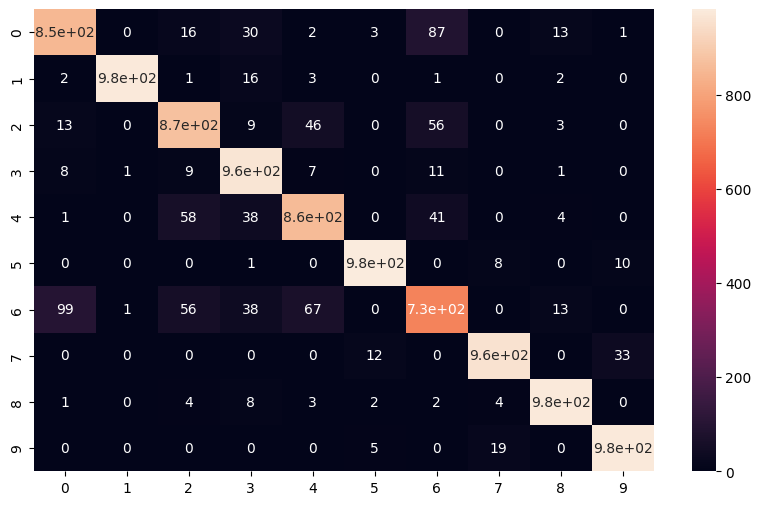

In [34]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, predictions.argmax(axis=1)), annot=True)